# **Repaso de Estadística descriptiva**

In [686]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [687]:
# 1. Generar un dataframe de edades aleatorias
np.random.seed(0)
valores = np.random.randint(18, 80, size=100)  # Edades entre 18 y 80
edades = pd.DataFrame(valores, columns=['Edad'])
# Cálculos
rango = np.max(edades) - np.min(edades)  # Rango de los datos
n = len(edades)  # Número de datos
# Regla de Sturges
num_intervalos_sturges = int(1 + 3.322 * np.log10(n))
# Calcular la amplitud
amplitud = rango / num_intervalos_sturges
print("Rango:", rango)
print("Número de datos:", n)
print("Número de intervalos (Sturges):", num_intervalos_sturges)
print("Amplitud de los intervalos:", amplitud)

Rango: 59
Número de datos: 100
Número de intervalos (Sturges): 7
Amplitud de los intervalos: 8.428571428571429


In [688]:
# Crear los límites de los intervalos
intervalos = [np.min(edades) + i * amplitud for i in range(num_intervalos_sturges + 1)]
intervalos = [round(limite, 2) for limite in intervalos]  # Redondear a 2 decimales
print("Intervalos:", intervalos)

Intervalos: [np.float64(18.0), np.float64(26.43), np.float64(34.86), np.float64(43.29), np.float64(51.71), np.float64(60.14), np.float64(68.57), np.float64(77.0)]


In [689]:
# Calcular las frecuencias
frecuencias, bordes = np.histogram(edades, bins=intervalos)
print("Frecuencias:", frecuencias)
print("Bordes:", bordes)

Frecuencias: [16 14 18  7 20  8 17]
Bordes: [18.   26.43 34.86 43.29 51.71 60.14 68.57 77.  ]


In [690]:
# Frecuencia relativa y acumulada
frecuencia_relativa = frecuencias / n
frecuencia_acumulada = np.cumsum(frecuencias)
# Crear tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    "Intervalo": [f"{bordes[i]:.2f} - {bordes[i+1]:.2f}" for i in range(len(bordes)-1)],
    "Frecuencia Absoluta": frecuencias,
    "Frecuencia Relativa": frecuencia_relativa,
    "Frecuencia Acumulada": frecuencia_acumulada
})
tabla_frecuencias

,Intervalo,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
0,18.00 - 26.43,16,0.16,16
1,26.43 - 34.86,14,0.14,30
2,34.86 - 43.29,18,0.18,48
3,43.29 - 51.71,7,0.07,55
4,51.71 - 60.14,20,0.20,75
5,60.14 - 68.57,8,0.08,83
6,68.57 - 77.00,17,0.17,100


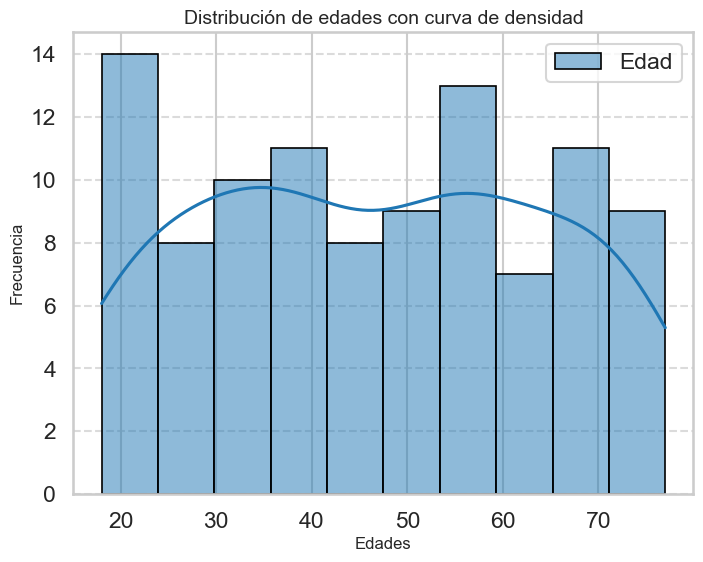

In [691]:
# Crear el histograma con la curva de densidad
plt.figure(figsize=(8, 6))
sns.histplot(edades, bins=10, kde=True, color="red", edgecolor="black", linewidth=1.2)

# Personalización del gráfico
plt.title("Distribución de edades con curva de densidad", fontsize=14)
plt.xlabel("Edades", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()


Q1 (Primer cuartil): 31.75
Mediana: 46.5
Q3 (Tercer cuartil): 60.5
IQR (Rango intercuartil): 28.75
Bigote inferior: 18
Bigote superior: 77


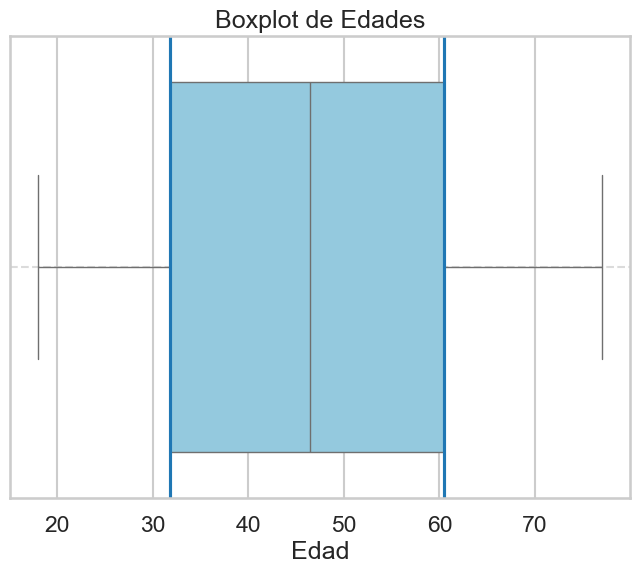

In [692]:
q1 = edades['Edad'].quantile(0.25)  # Primer cuartil (Q1)
q3 = edades['Edad'].quantile(0.75)  # Tercer cuartil (Q3)
iqr = q3 - q1  # Rango intercuartil (IQR)
mediana = edades['Edad'].median()  # Mediana
min_val = edades['Edad'].min()  # Valor mínimo
max_val = edades['Edad'].max()  # Valor máximo
# Calcular los umbrales para outliers
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr
# Calcular los valores de los bigotes
bigote_inferior = edades['Edad'][edades['Edad'] >= lower_threshold].min()
bigote_superior = edades['Edad'][edades['Edad'] <= upper_threshold].max()

# Mostrar estadísticas
print(f"Q1 (Primer cuartil): {q1}")
print(f"Mediana: {mediana}")
print(f"Q3 (Tercer cuartil): {q3}")
print(f"IQR (Rango intercuartil): {iqr}")
# Mostrar los resultados
print(f"Bigote inferior: {bigote_inferior}")
print(f"Bigote superior: {bigote_superior}")

# 3. Graficar el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=edades, x='Edad', color='skyblue')
plt.title('Boxplot de Edades')
plt.xlabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(q1)
plt.axvline(q3)
# Mostrar el gráfico
plt.show()


-------------------------------------------------------

# **Repaso de Distribuciones de probabilidad**

![Relación de Distribuciones de probabilidad](https://www.datasciencecentral.com/wp-content/uploads/2021/10/136706870-2.jpg)


**1. Distribuciones Uniforme y Bernoulli:**
- La Uniforme discreta es un punto de partida genérico para muchas distribuciones discretas, donde cada evento tiene la misma probabilidad.
- La Bernoulli se deriva de eventos binarios, y es un caso especial de la Uniforme donde solo hay dos resultados (éxito y fracaso).     

**2. Distribución Binomial:**   
- La Binomial surge de la suma de múltiples ensayos de Bernoulli independientes. Modela la probabilidad de obtener un número fijo de éxitos en n ensayos.   

**3. Distribuciones relacionadas con la Binomial:**   
- Hipergeométrica: Similar a la Binomial, pero usada cuando se selecciona sin reemplazo.   
- Geométrica: Modela el número de ensayos hasta el primer éxito en experimentos de Bernoulli.   
- Negativa Binomial: Generaliza la Geométrica, modelando el número de ensayos necesarios para alcanzar un número fijo de éxitos.   

**4. Distribución de Poisson:**   
- Es un límite de la Binomial cuando 𝑛 es grande y 𝑝 es pequeño. Modela eventos raros en un intervalo fijo de tiempo o espacio.   

**5. Distribuciones derivadas de la Poisson y exponenciales:**   
- Exponencial: Modela el tiempo entre eventos en un proceso de Poisson. Es continua, mientras que la Poisson es discreta.   
- Weibull: Generaliza la Exponencial, añadiendo un parámetro de forma para modelar tasas de falla cambiantes.   

**6. Distribución Normal:**   
- Es un límite de la Binomial o Poisson cuando 𝑛 tiende a infinito, según el Teorema Central del Límite. Es una distribución clave para datos continuos.
    
- La **distribución normal** es una distribución de probabilidad simétrica que tiene una forma de campana, donde la mayoría de los valores se agrupan alrededor de la media. Está caracterizada por dos parámetros: la **media** ($( \mu $)) y la **desviación estándar** ($( \sigma $)). 

- La **distribución normal estándar** es un caso particular de la distribución normal, donde la **media** es 0 y la **desviación estándar** es 1.
- La **Estandarización** transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Se utiliza cuando se necesita que los datos sigan una distribución normal estándar (aunque no necesariamente lo hagan)

Los valores de la distribución normal estándar se obtienen mediante la estandarización de los datos provenientes de una distribución normal. Es útil en inferencia estadística y pruebas de hipótesis, donde se pueden usar tablas de la distribución normal estándar para calcular probabilidades y valores críticos.

 
**7. Distribuciones derivadas de la Normal:**   
- Log-normal: Modela variables cuya logaritmo sigue una Normal.   
- Student's t: Se utiliza cuando la media poblacional es desconocida y se estima a partir de muestras pequeñas.   
- Chi-cuadrado: Surge al sumar cuadrados de variables normales independientes.
- Gamma: Generaliza la Chi-cuadrado y está relacionada con la Exponencial.   
- Beta: Modela proporciones y probabilidades, derivándose de la Gamma.   

Nota:  Cuando decimos que una distribución es una generalización de otra, nos referimos a que la distribución generalizada incluye a la original como un caso particular al fijar ciertos valores de sus parámetros. Esto significa que la distribución más general abarca un rango más amplio de formas o situaciones que la distribución original no puede modelar por sí sola.

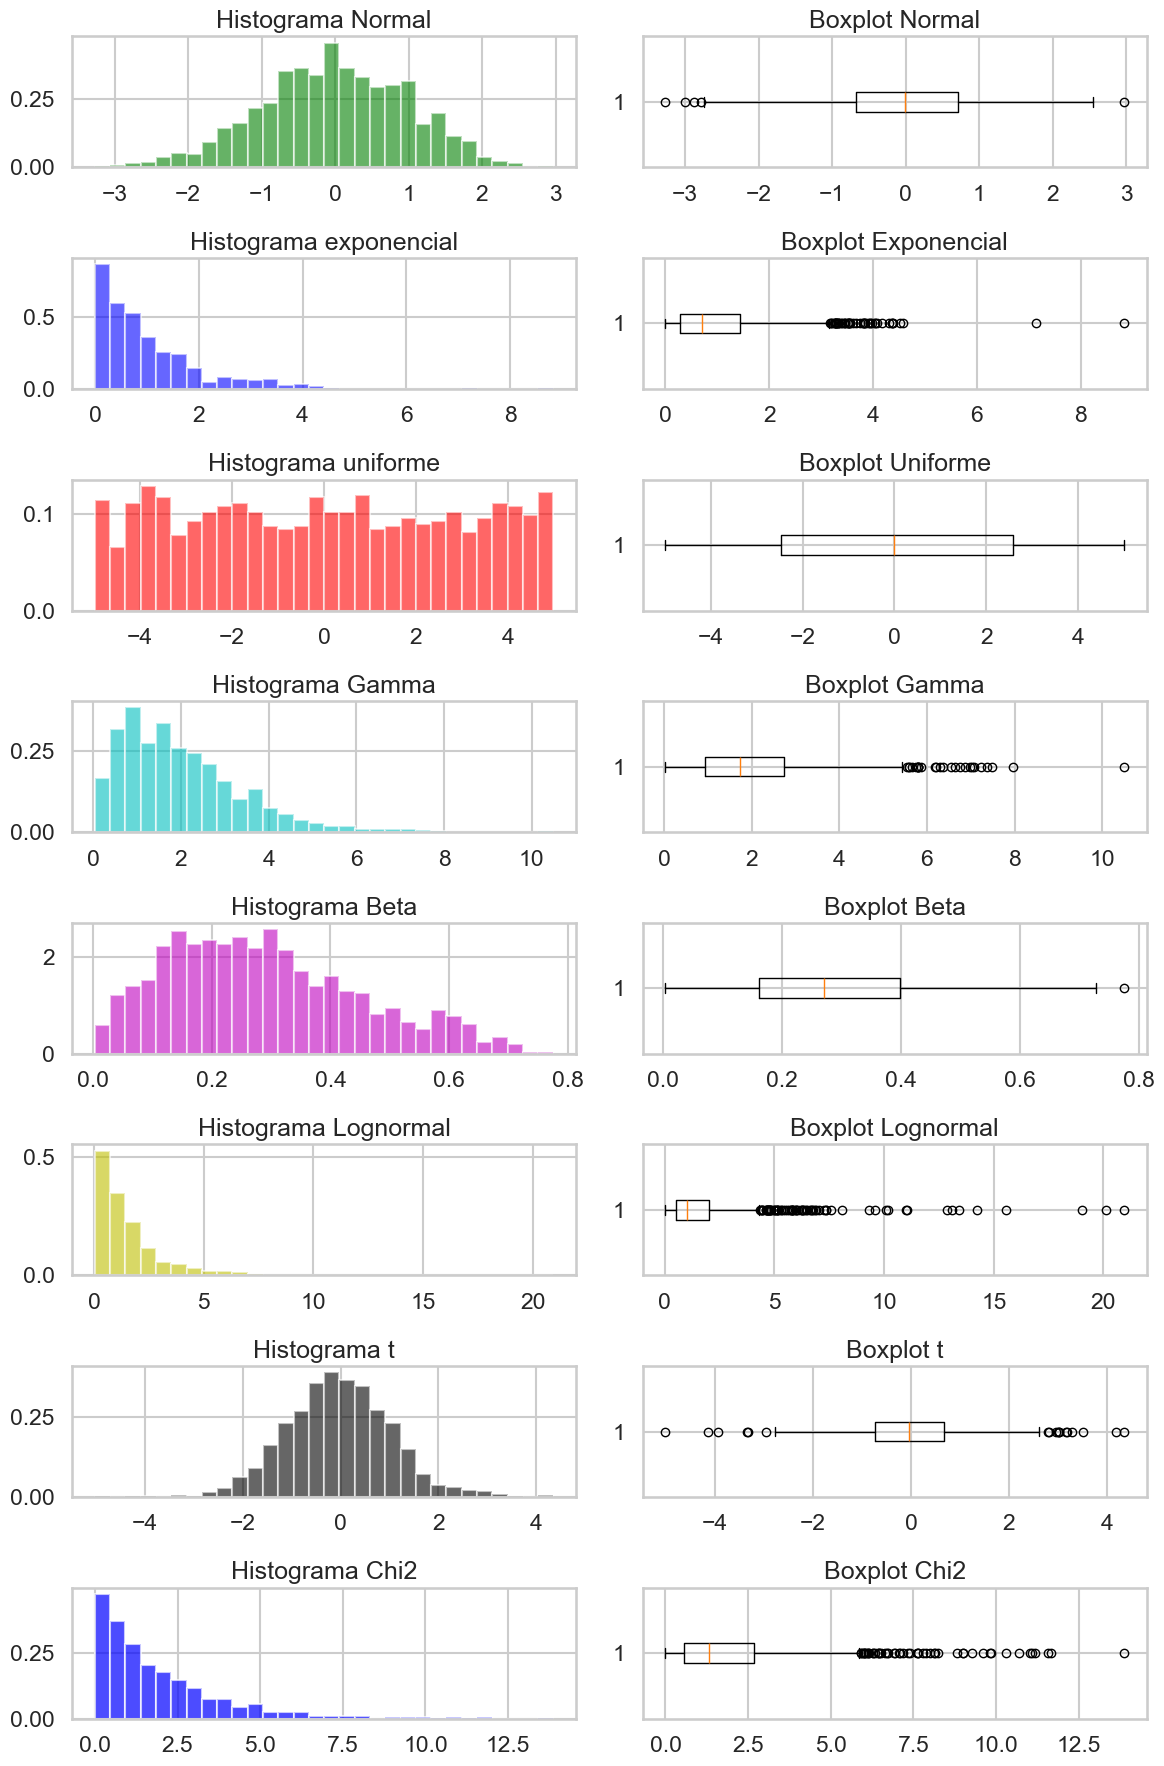

In [693]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson, expon, uniform, gamma, beta, lognorm, t, chi2, weibull_min, bernoulli, pareto

# Rango de valores
x = np.linspace(-3, 3, 100)
x_binom = np.arange(0, 11)
x_poisson = np.arange(0, 21)
x_weibull = np.linspace(0, 5, 1000)

# Generar datos de muestra para histogramas
data_normal = np.random.normal(0, 1, 1000)
data_expon = np.random.exponential(1, 1000)
data_uniform = np.random.uniform(-5, 5, 1000)
data_gamma = np.random.gamma(2, 1, 1000)
data_beta = np.random.beta(2, 5, 1000)
data_lognorm = np.random.lognormal(0, 1, 1000)
data_t = np.random.standard_t(10, 1000)
data_chi2 = np.random.chisquare(2, 1000)

# Graficar todas las distribuciones
fig, axs = plt.subplots(8, 2, figsize=(12, 18))

# Histograma y Boxplot de la distribución Normal
axs[0, 0].hist(data_normal, bins=30, density=True, alpha=0.6, color='g')
axs[0, 0].set_title('Histograma Normal')
axs[0, 1].boxplot(data_normal, vert=False)
axs[0, 1].set_title('Boxplot Normal')

# Histograma y Boxplot de la distribución Binomial
axs[1, 0].hist(data_expon, bins=30, density=True, alpha=0.6, color='b')
axs[1, 0].set_title('Histograma exponencial')
axs[1, 1].boxplot(data_expon, vert=False)
axs[1, 1].set_title('Boxplot Exponencial')

# Histograma y Boxplot de la distribución Poisson
axs[2, 0].hist(data_uniform, bins=30, density=True, alpha=0.6, color='r')
axs[2, 0].set_title('Histograma uniforme')
axs[2, 1].boxplot(data_uniform, vert=False)
axs[2, 1].set_title('Boxplot Uniforme')

# Histograma y Boxplot de la distribución Exponencial
axs[3, 0].hist(data_gamma, bins=30, density=True, alpha=0.6, color='c')
axs[3, 0].set_title('Histograma Gamma')
axs[3, 1].boxplot(data_gamma, vert=False)
axs[3, 1].set_title('Boxplot Gamma')

# Histograma y Boxplot de la distribución Uniforme
axs[4, 0].hist(data_beta, bins=30, density=True, alpha=0.6, color='m')
axs[4, 0].set_title('Histograma Beta')
axs[4, 1].boxplot(data_beta, vert=False)
axs[4, 1].set_title('Boxplot Beta')

# Histograma y Boxplot de la distribución Gamma
axs[5, 0].hist(data_lognorm, bins=30, density=True, alpha=0.6, color='y')
axs[5, 0].set_title('Histograma Lognormal')
axs[5, 1].boxplot(data_lognorm, vert=False)
axs[5, 1].set_title('Boxplot Lognormal')

# Histograma y Boxplot de la distribución Beta
axs[6, 0].hist(data_t, bins=30, density=True, alpha=0.6, color='k')
axs[6, 0].set_title('Histograma t')
axs[6, 1].boxplot(data_t, vert=False)
axs[6, 1].set_title('Boxplot t')

# Histograma y Boxplot de la distribución Beta
axs[7, 0].hist(data_chi2, bins=30, density=True, alpha=0.7, color='b')
axs[7, 0].set_title('Histograma Chi2')
axs[7, 1].boxplot(data_chi2, vert=False)
axs[7, 1].set_title('Boxplot Chi2')

#Histrogram

# Ajustar los márgenes para que las subgráficas no se solapen
plt.tight_layout()
plt.show()


# **Resumen de Estadística Inferencial**

La **estadística inferencial** es la rama de la estadística que permite sacar conclusiones sobre una población completa a partir de una muestra representativa. Sus herramientas permiten estimar parámetros poblacionales, evaluar hipótesis y predecir comportamientos futuros.

## **1. Componentes clave**

- **Población y muestra:**
  - **Población:** Conjunto completo de individuos o elementos que queremos estudiar.
  - **Muestra:** Subconjunto representativo de la población que utilizamos para inferir.

- **Parámetros y estadísticos:**
  - **Parámetro:** Medida que describe una característica de la población (por ejemplo, la media poblacional).
  - **Estadístico:** Medida calculada a partir de la muestra para estimar el parámetro poblacional.



In [694]:
import math

# Datos de entrada
Z = 1.96  # valor Z para un 95% de confianza
sigma = 10  # desviación estándar de la población
E = 2 # margen de error deseado

# Cálculo del tamaño de la muestra
n = (Z * sigma / E) ** 2
n = math.ceil(n)  # Redondeamos al número entero superior

print(f"Tamaño de la muestra necesario: {n}")


Tamaño de la muestra necesario: 97




## **2. Técnicas principales**

### **Estimación**

- **Estimación puntual:** 
  - Usa un único valor muestral (como la media muestral) para estimar un parámetro poblacional.
- **Estimación por intervalo (Intervalo de confianza):**
  - Proporciona un rango de valores, con un nivel de confianza específico (por ejemplo, 95%), que contiene el parámetro poblacional.

### **Pruebas de hipótesis**
Métodos estadísticos para evaluar afirmaciones sobre parámetros poblacionales.

- **Objetivo:** Evaluar afirmaciones sobre la población basándose en datos muestrales.
  - **Hipótesis nula ($(H_0$)):** Suposición inicial que establece que no hay efecto o diferencia significativa.

  - **Hipótesis alternativa ($(H_a$)):** Afirmación que contradice la hipótesis nula y que queremos probar.

  - **Intervalo de confianza** es un rango de valores que se utiliza para estimar un parámetro poblacional. Este intervalo tiene un nivel de confianza asociado que indica la probabilidad de que el parámetro real de la población se encuentre dentro de ese rango.

    **Ejemplo básico:**
      Supongamos que se quiere probar si un medicamento tiene efecto sobre la presión arterial. La hipótesis nula sería que el medicamento no tiene ningún efecto (es decir, la media de la presión arterial antes y después de usar el medicamento es igual).

      $[ H_0: \mu_{antes} = \mu_{después} $]

      Esto implica que no hay diferencia significativa en la presión arterial antes y después del tratamiento.
      Supongamos que tenemos una muestra de 100 estudiantes y queremos estimar la media de horas que dedican al estudio a la semana. Después de realizar el análisis, obtenemos un intervalo de confianza del 95% de [10, 12] horas.

      Siguiendo el mismo ejemplo de medicamentos, la hipótesis alternativa sería que el medicamento sí tiene un efecto sobre la presión arterial. Es decir, que la media de la presión arterial antes y después del tratamiento es diferente.

      $[ H_a: \mu_{antes} \neq \mu_{después} $]

      Esto indica que hay una diferencia significativa en la presión arterial antes y después de usar el medicamento.
  - **Nivel de confianza:** Probabilidad de que el intervalo de confianza     contenga el parámetro poblacional (ejemplo: 95%).
  - **Nivel de significancia ($(\alpha$)):** Probabilidad de cometer un error tipo I (rechazar \(H_0\) cuando es verdadera), comúnmente 0.05.
  - **p-valor:** Probabilidad de observar un resultado igual o más extremo que el obtenido, asumiendo que $(H_0$) es verdadera.


- **Pasos principales:**
  1. Formular la hipótesis nula ($(H_0$)) y la hipótesis alternativa ($(H_a$)).
  2. Seleccionar el nivel de significancia ($(\alpha$)).
  3. Calcular el estadístico de prueba y compararlo con el valor crítico.
  4. Tomar una decisión: aceptar $(H_0$) o rechazarla.
- **Errores comunes:**
  - **Error tipo I:** Rechazar $(H_0$) cuando es verdadera.
  - **Error tipo II:** No rechazar $(H_0$) cuando es falsa.



## **3. Distribuciones relevantes**

Las distribuciones de probabilidad desempeñan un papel central en la estadística inferencial:

1. **Distribución normal:**
   - Base para muchas inferencias debido al Teorema del Límite Central.
   - Aproximada para grandes tamaños muestrales.

2. **Distribución t de Student:**
   - Usada cuando el tamaño muestral es pequeño o no se conoce la desviación estándar poblacional.

3. **Distribución Chi-cuadrada ($(\chi^2$)):**
   - Aplicada en pruebas de independencia y bondad de ajuste.

4. **Distribución F:**
   - Empleada para comparar varianzas y en análisis de varianza (ANOVA).



## **4. Conceptos clave**

- **Nivel de significancia ($(\alpha$)):** Probabilidad de cometer un error tipo I, generalmente 0.05 (5%).
- **p-valor:** Probabilidad de obtener un estadístico tan extremo como el observado, asumiendo que $(H_0$) es verdadera. Si $(p < \alpha$), rechazamos \(H_0\).
- **Error estándar:** Precisión de un estadístico muestral para estimar el parámetro poblacional.
- **Grados de libertad:** Número de valores independientes que pueden variar en un cálculo estadístico, especialmente relevante en pruebas t y $(\chi^2$).



## **5. Aplicaciones prácticas**

- **Comparación de medias:**
  - Determinar si dos grupos tienen diferencias significativas.
  - Pruebas: t de Student o Z.
- **Análisis de varianza (ANOVA):**
  - Comparar más de dos medias grupales.
- **Pruebas de bondad de ajuste:**
  - Evaluar si una distribución muestral se ajusta a una distribución teórica (usando $(\chi^2$)).
- **Análisis de correlación y regresión:**
  - Estudiar relaciones entre variables y realizar predicciones.







## **6. Ejemplo práctico**
Imaginemos que eres un investigador que quiere saber si dos grupos de personas (un grupo que usa un medicamento A y otro que usa un medicamento B) tienen diferencias significativas en sus niveles de colesterol después de 6 meses de tratamiento. Tienes los siguientes datos:   

Grupo A (medicación A): [220, 240, 210, 215, 250, 245, 235]   
Grupo B (medicación B): [180, 190, 200, 210, 185, 175, 195]   

Queremos realizar una prueba t de Student para muestras independientes para ver si las medias de los dos grupos son significativamente diferentes.



Estadístico t: 5.355644389732041
Valor p: 0.00017202295240490524
Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos.


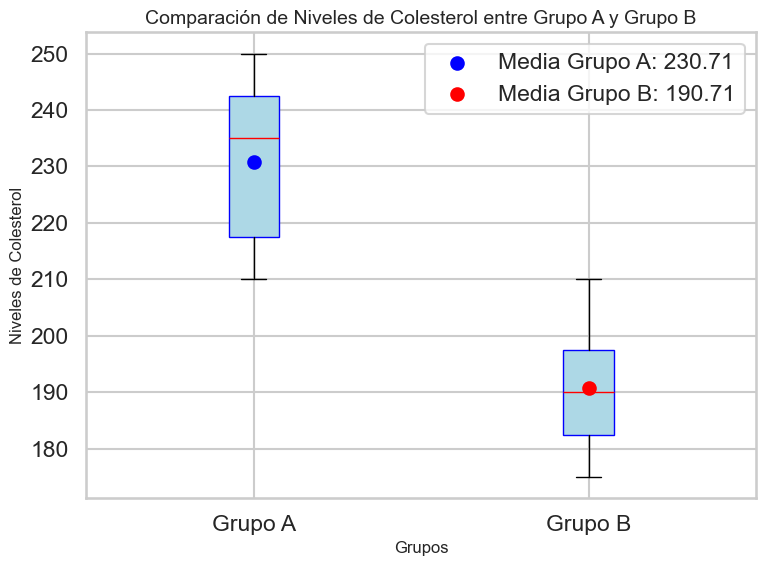

In [695]:
from scipy import stats

# Datos de los dos grupos
grupo_a = np.array([220, 240, 210, 215, 250, 245, 235])
grupo_b = np.array([180, 190, 200, 210, 185, 175, 195])

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(grupo_a, grupo_b)

# Mostrar los resultados
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Interpretación
alpha = 0.05  # Nivel de significancia del 5%

if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre los grupos.")

# Datos de los dos grupos
grupo_a = np.array([220, 240, 210, 215, 250, 245, 235])
grupo_b = np.array([180, 190, 200, 210, 185, 175, 195])

# Crear un gráfico de boxplot
plt.figure(figsize=(8, 6))

# Graficar el boxplot de los dos grupos
plt.boxplot([grupo_a, grupo_b], tick_labels=['Grupo A', 'Grupo B'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

# Graficar las medias de los dos grupos
media_a = np.mean(grupo_a)
media_b = np.mean(grupo_b)
plt.scatter([1], [media_a], color='blue', zorder=5, label=f'Media Grupo A: {media_a:.2f}')
plt.scatter([2], [media_b], color='red', zorder=5, label=f'Media Grupo B: {media_b:.2f}')

# Configuración del gráfico
plt.title('Comparación de Niveles de Colesterol entre Grupo A y Grupo B', fontsize=14)
plt.ylabel('Niveles de Colesterol', fontsize=12)
plt.xlabel('Grupos', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El gráfico nos ayuda a ver visualmente si hay una diferencia en las distribuciones de los dos grupos.
Si las medianas de ambos grupos están separadas y las cajas no se solapan mucho, esto sugiere que podría haber una diferencia significativa entre los grupos, lo que se corroboraría con el valor p obtenido de la prueba t.

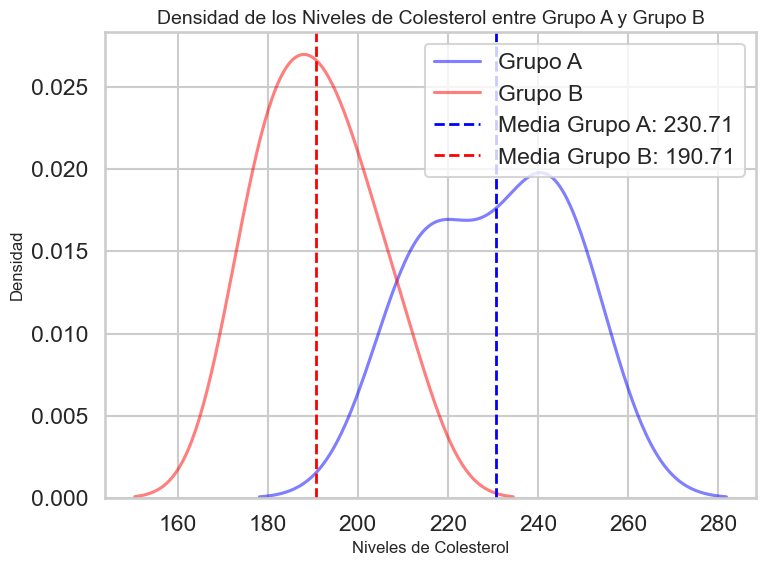

In [696]:
# Calcular el estadístico t y p-value
t_stat, p_value = stats.ttest_ind(grupo_a, grupo_b)

# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))

# Dibujar las curvas de densidad para los dos grupos
sns.kdeplot(grupo_a, label='Grupo A', color='blue', alpha=0.5)
sns.kdeplot(grupo_b, label='Grupo B', color='red',  alpha=0.5)

# Marcar las medias de ambos grupos
media_a = np.mean(grupo_a)
media_b = np.mean(grupo_b)
plt.axvline(media_a, color='blue', linestyle='dashed', linewidth=2, label=f'Media Grupo A: {media_a:.2f}')
plt.axvline(media_b, color='red', linestyle='dashed', linewidth=2, label=f'Media Grupo B: {media_b:.2f}')

# Configuración del gráfico
plt.title('Densidad de los Niveles de Colesterol entre Grupo A y Grupo B', fontsize=14)
plt.xlabel('Niveles de Colesterol', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Si las distribuciones de los dos grupos se solapan muy poco o no se solapan en absoluto, esto es consistente con una diferencia significativa entre los grupos.
Si el valor p es pequeño (por debajo de 0.05), podemos rechazar la hipótesis nula de que las medias son iguales.


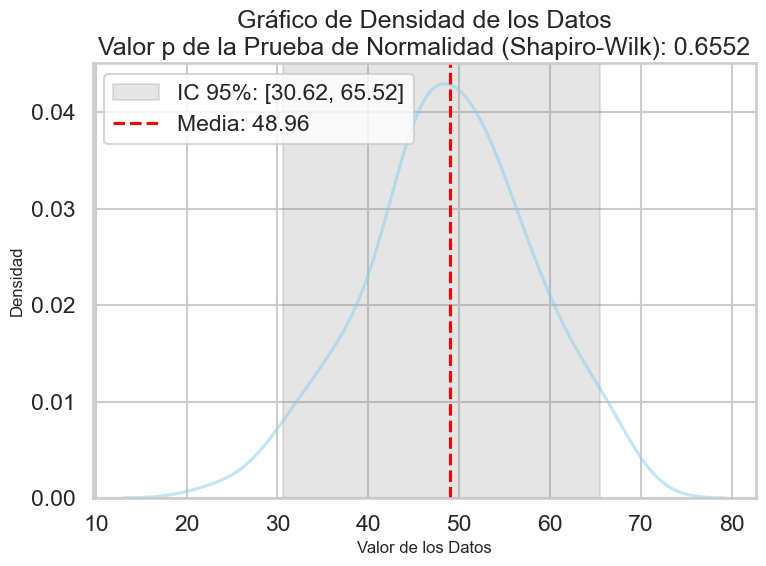

Valor p de la prueba de normalidad de Shapiro-Wilk: 0.6552


In [697]:


# Paso 1: Generar un conjunto de datos aleatorios (Ejemplo con 100 datos)
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Distribución normal

# Paso 2: Realizar la prueba de normalidad de Shapiro-Wilk
stat, p_value = stats.shapiro(data)

# Paso 3: Graficar la densidad de los datos
plt.figure(figsize=(8, 6))

# Graficar la curva de densidad
sns.kdeplot(data,  color="skyblue", alpha=0.5)

# Paso 4: Marcar el intervalo de confianza (usamos una fórmula aproximada para el IC)
# Intervalo de confianza al 95%
ci_low, ci_high = np.percentile(data, [2.5, 97.5])

# Graficar el intervalo de confianza
plt.axvspan(ci_low, ci_high, color='gray', alpha=0.2, label=f'IC 95%: [{ci_low:.2f}, {ci_high:.2f}]')

# Paso 5: Marcar el valor p en el gráfico
plt.axvline(x=np.mean(data), color='red', linestyle='dashed', label=f'Media: {np.mean(data):.2f}')
plt.title(f'Gráfico de Densidad de los Datos\nValor p de la Prueba de Normalidad (Shapiro-Wilk): {p_value:.4f}')
plt.xlabel('Valor de los Datos', fontsize=12)
plt.ylabel('Densidad', fontsize=12)

# Mostrar el valor p en el gráfico
plt.legend()

# Paso 6: Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir el resultado de la prueba de normalidad
print(f"Valor p de la prueba de normalidad de Shapiro-Wilk: {p_value:.4f}")


## Test de Hipótesis

En estadística, las pruebas de hipótesis calculan la probabilidad de que un evento suceda, asumiendo que se cumple una cierta hipótesis de partida, llamada **H0**. Cuando hacemos un test de hipótesis generalmente queremos descartar la hipótesis H0 que asumimos, y por lo tanto nos interesa que esa probabilidad sea muy pequeña. Esta probabilidad que calculamos en estadística se conoce como el **p-valor** (p-value en inglés) y en general se busca que su valor sea menor que un valor arbitrario que se define como "poco probable", generalmente 5% o 0.05, pero podemos elegir el que consideremos mejor.

Si la probabilidad de que algo suceda dado que la Hipótesis H0 se cumple es muy muy baja, entonces podemos asumir que es poco probable que la hipótesis H0 se cumpla, y por lo tanto la descartamos. Si esto no es así, no podemos asegurar nada sobre la hipótesis H0.

Algunos casos de uso habituales de los test de hipótesis en ciencia de datos son:
- Pruebas de normalidad: queremos estimar si nuestros datos provienen de una distribución normal
- Pruebas de origen: queremos determinar si dos muestras provienen de la misma distribución
- Pruebas de mejora: queremos determinar si las nuevas mediciones realizadas después de un cambio son significativamente mejores que las anteriores (vale la pena cambiar la metodología?).

## Pruebas de normalidad

Una aplicación buena de un test de Hipótesis son las llamadas pruebas de normalidad. Queremos saber si nuestros datos provienen de una distribución normal, o si debemos aplicar algún tipo de normalización (como veremos más adelante). Para ello podemos utilizar alguno de los tests de normalidad más frecuentes:

- Shapiro-Wilk
- Kolmogorov-Smirnov
- D'Agostino

La hipótesis nula (H0) para todos estos tests es que la función tiene distribuión normal, por lo tanto si realizamos el test y obtenemos un p-valor menor a 0.05, podemos decir que los datos no provienen de la distribución normal. Para ponerlo en práctica generaremos dos muestras: X1 será una nube de puntos aleatorios, X2 será una distribución normal.


## **Pruebas Paramétricas:**

1. **Prueba t de Student (Prueba t para una muestra y Prueba t para dos muestras):**
   - **Descripción:** Compara las medias de una o dos muestras para determinar si existen diferencias significativas.
   - **Ejemplo de uso:** Comparar las calificaciones de dos grupos de estudiantes después de recibir diferentes métodos de enseñanza.

2. **Análisis de Varianza (ANOVA):**
   - **Descripción:** Evalúa si hay diferencias significativas entre las medias de tres o más grupos.
   - **Ejemplo de uso:** Determinar si hay diferencias en el rendimiento académico entre estudiantes de tres escuelas diferentes.

3. **Regresión Lineal:**
   - **Descripción:** Examina la relación lineal entre una variable dependiente y una o más variables independientes.
   - **Ejemplo de uso:** Analizar la relación entre el tiempo de estudio y el rendimiento en los exámenes.

4. **Prueba de Correlación de Pearson:**
   - **Descripción:** Evalúa la fuerza y la dirección de la relación lineal entre dos variables cuantitativas.
   - **Ejemplo de uso:** Investigar la relación entre la cantidad de ejercicio y el índice de masa corporal (IMC).

5. **Prueba de Homogeneidad de Varianzas:**
   - **Descripción:** Comprueba si las varianzas de dos o más grupos son iguales.
   - **Ejemplo de uso:** Antes de realizar una prueba t, verificar si las varianzas de dos grupos de datos son homogéneas.



## **Pruebas No Paramétricas:**

1. **Prueba de Mann-Whitney:**
   - **Descripción:** Compara las medianas de dos grupos independientes cuando no se pueden asumir distribuciones normales.
   - **Ejemplo de uso:** Comparar las calificaciones de dos grupos de estudiantes que no siguen una distribución normal.

2. **Prueba de Wilcoxon para Muestras Relacionadas:**
   - **Descripción:** Compara las medianas de dos muestras relacionadas.
   - **Ejemplo de uso:** Evaluar si hay una diferencia significativa entre las puntuaciones de un grupo de personas antes y después de un tratamiento.

3. **Prueba de Kruskal-Wallis:**
   - **Descripción:** Generalización de la prueba de Mann-Whitney para más de dos grupos independientes.
   - **Ejemplo de uso:** Determinar si hay diferencias significativas en los tiempos de entrega entre tres o más proveedores.

4. **Prueba de Chi-cuadrado:**
   - **Descripción:** Evalúa la asociación entre dos variables categóricas.
   - **Ejemplo de uso:** Investigar si hay una asociación significativa entre el tipo de actividad física (ligera, moderada, intensa) y la categoría de peso (bajo peso, normal, sobrepeso).

5. **Prueba de Friedman:**
   - **Descripción:** Versión no paramétrica del ANOVA, compara las medianas de tres o más muestras relacionadas.
   - **Ejemplo de uso:** Analizar si hay diferencias significativas en los niveles de satisfacción de los empleados en tres departamentos diferentes a lo largo del tiempo.